# Graphing Repo For Distribution

<h2> Function to plot the normal distbution graph <h2>

In [60]:
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import pandas as pd
import csv
from collections import defaultdict

<h3> The files Processing </h3>

In [23]:
def process_csv(file,location=None):
    counter=defaultdict(int)
    df = pd.read_csv(file)
    if(location==None):
        for i in df['Matching'].tolist():
            counter[str(i)]+=1
    else:
        matching_scores=df['Matching'].tolist()
        for i in location:
            counter[str(matching_scores[i])]+=1
    return [int(i) for i in counter.keys()],counter.values()

<h3> the function </h3>

In [61]:
class Distribution:
    @staticmethod
    #lower bound and upper bound are the actual matching score, not percentage
    def plot(x_axis:list, y_axis:list, upper_bound=100,
            title=None, x_label=None, y_label=None, legend_label=None, legend_location="best"):
        title        = title        or "Matching Score Distribution"
        x_label      = x_label      or "Matching Scores"
        y_label      = y_label      or "Frequency/Occurance"
        legend_label = legend_label or "Benchmark Mean ={} Std = {}".format(np.mean(np.array(x_axis)),np.std(np.array(x_axis)))
        plt.title(title)
        plt.bar(x_axis, y_axis, 1/1.5, alpha=0.75,label=legend_label,log=True)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc=legend_location)
        return plt

In [34]:
clustered_attack_indices=sorted([i+(j*256) for i in range(129,256) for j in range(0,4)])
clustered_normal_indices=sorted([i+(j*256) for i in range(129) for j in range(0,4)])

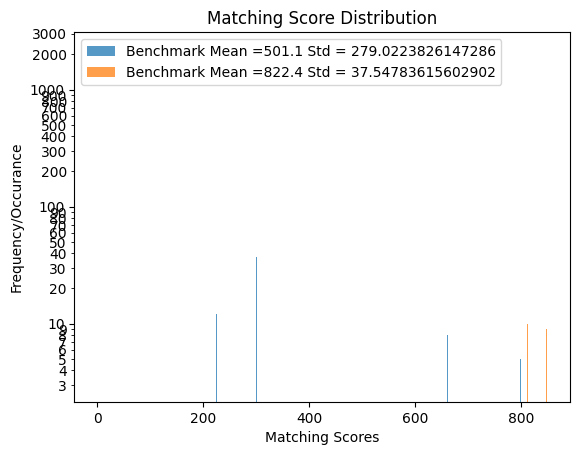

In [62]:
x,y=process_csv("Huffman_Cluster_800.csv",clustered_attack_indices)
k,j=process_csv("Huffman_Distribution.csv")
plot=Distribution.plot(x,y,upper_bound=600)
plot=Distribution.plot(k,j,upper_bound=600)
#plt.ylim=([0,1000])
plot.show()
